# SENET
---

In [2]:
import os
os.chdir("c:\\Users\\riandrea\\Desktop\\Github\\SceneDetect")
os.getcwd()


'c:\\Users\\riandrea\\Desktop\\Github\\SceneDetect'

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_0', pretrained=True)

# model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_1', pretrained=True)
#model.eval()

Using cache found in C:\Users\riandrea/.cache\torch\hub\pytorch_vision_v0.10.0


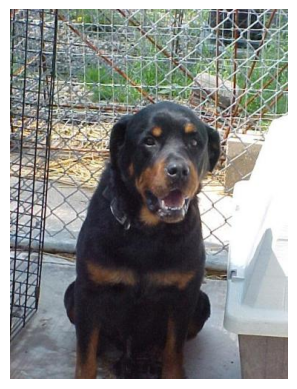

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "cats_and_dogs_small/test/dogs/1586.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = Image.open("cats_and_dogs_small/test/dogs/1586.jpg")

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()

### From dir path

In [5]:
from PIL import Image
image = Image.open(r"cats_and_dogs_small\test\dogs\1586.jpg")


In [6]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

input_image = Image.open(r"cats_and_dogs_small\test\dogs\1586.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0].shape)
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities.shape)

torch.Size([1000])
torch.Size([1000])


In [7]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [8]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Rottweiler 0.9470342993736267
Gordon setter 0.039772242307662964
black-and-tan coonhound 0.005141178146004677
Doberman 0.004673833958804607
Tibetan mastiff 0.003203233005478978


### From Url example Code

In [9]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [10]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0].shape)
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities.shape)

torch.Size([1000])
torch.Size([1000])


In [12]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [13]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.9516656398773193
Arctic fox 0.021752847358584404
Great Pyrenees 0.011641217395663261
white wolf 0.0029543789569288492
papillon 0.0027892650105059147


---

# Fine tune SENET 

In [ ]:
import torch
import torch.nn as nn

# Lade das vortrainierte SqueezeNet-Modell
model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_0', pretrained=True)

# Behalte das Basis-Modell bei
base_model = model.features  # Das ist die 'Feature'-Extraktionseinheit

# Füge neue Schichten für die Klassifikation hinzu
num_classes = 5  # Anzahl der Klassen in deinem Datensatz

# Neue Klassifikationsschicht
new_classifier = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),  # Reduziert die Ausgabedimensionen auf 1x1
    nn.Flatten(),  # Wandelt die 2D-Ausgabe in einen 1D-Vektor um
    nn.Linear(512, num_classes)  # Die letzte Schicht für die Klassifikation
)

# Kombiniere das Basis-Modell mit der neuen Klassifikationsschicht
model = nn.Sequential(
    base_model,
    new_classifier
)

# Initialisiere das Modell für das Training
model.train()

# Definiere den Optimierer und die Verlustfunktion
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Beispiel für einen Trainingsloop
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, labels in dataloader:  # Angenommen, du hast einen DataLoader `dataloader`
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
